In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://api.covidtracking.com/v1/states/daily.csv"
s=requests.get(url).content

In [3]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [6]:
df['state']=df['state'].apply(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         20780 non-null  datetime64[ns]
 1   state                        20780 non-null  object        
 2   positive                     20592 non-null  float64       
 3   probableCases                9271 non-null   float64       
 4   negative                     13290 non-null  float64       
 5   pending                      2138 non-null   float64       
 6   totalTestResultsSource       20780 non-null  object        
 7   totalTestResults             20614 non-null  float64       
 8   hospitalizedCurrently        17339 non-null  float64       
 9   hospitalizedCumulative       12382 non-null  float64       
 10  inIcuCurrently               11636 non-null  float64       
 11  inIcuCumulative              3789 non-nul

In [8]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [9]:
df.fillna(value=-1, inplace=True)

In [10]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA','OK']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=10)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=10)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

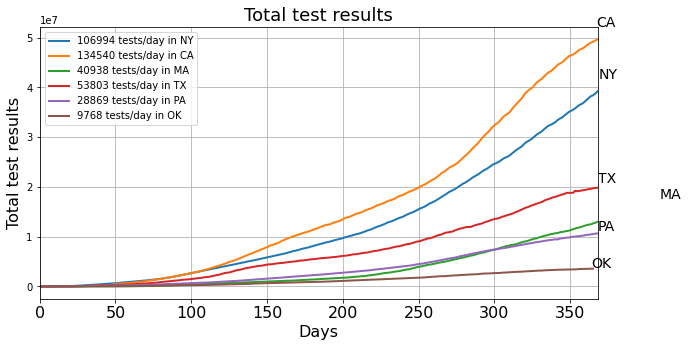

In [11]:
plotTesting()

In [12]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [13]:
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

In [14]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [15]:

def recovery_ratio(state='OK'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

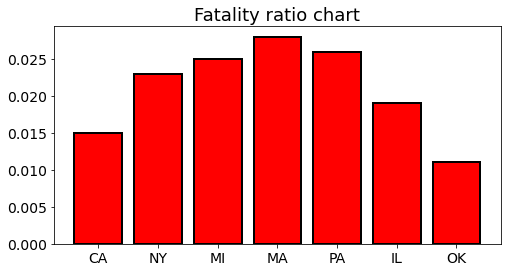

In [16]:
states = ['CA','NY','MI','MA','PA','IL','OK']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=0:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

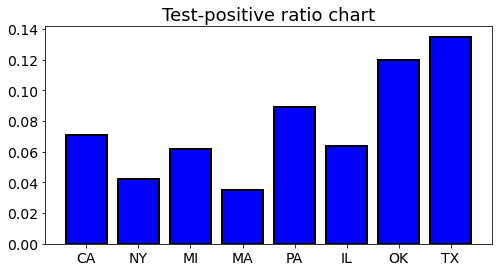

In [17]:
states = ['CA','NY','MI','MA','PA','IL','OK','TX']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

<ipython-input-18-dd8ffaa15315>:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=s,xy=(x[i],fr[i]))


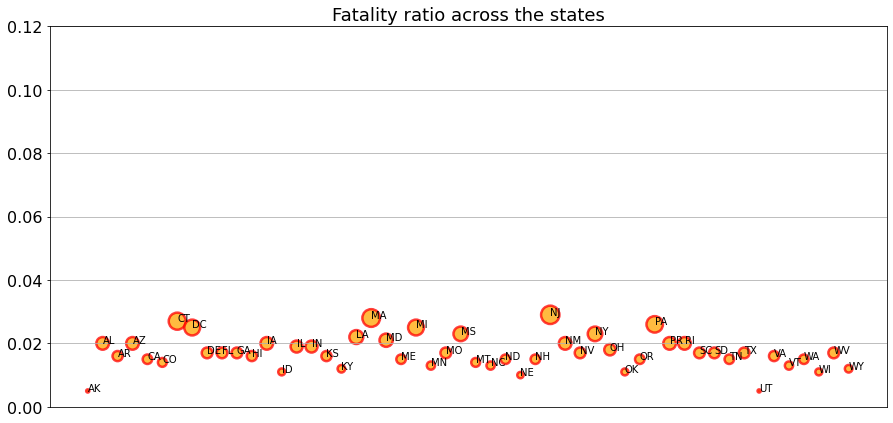

In [18]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

<ipython-input-19-6289fdf17994>:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=s,xy=(x[i],tp[i]))


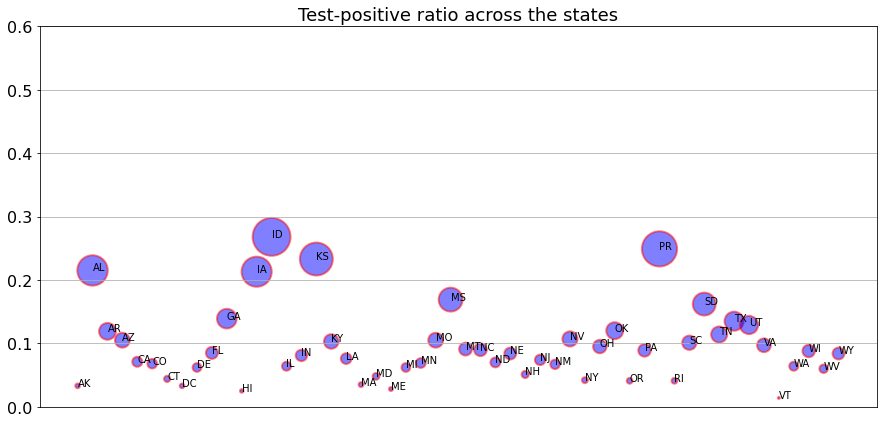

In [19]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [20]:
df_hi_states = df[df.positive >= 1000000]
df_hi_states

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
5,2021-03-07,CA,3501394.0,-1.0,-1.0,-1.0,totalTestsViral,49646014.0,4291.0,-1.0,...,-1.0,258,0,63c5c0fd2daef2fb65150e9db486de98ed3f7b72,0,0,0,0,0,-1.0
10,2021-03-07,FL,1909209.0,360372.0,9339038.0,8544.0,totalTestEncountersViral,22339182.0,3307.0,82237.0,...,-1.0,66,92,e69aca367d15584f4db13bd791804be1b017efc7,0,0,0,0,0,-1.0
11,2021-03-07,GA,1023487.0,195151.0,-1.0,-1.0,totalTestsViral,7359069.0,2008.0,56797.0,...,-1.0,1,35,d64d091b3e0b4c47cb7a80c60b7fc6dd1d15d6dd,0,0,0,0,0,-1.0
16,2021-03-07,IL,1198335.0,-1.0,-1.0,-1.0,totalTestsViral,18640190.0,1141.0,-1.0,...,-1.0,12,0,b7f807d015574eb38516d454d35cc6c09effb16b,0,0,0,0,0,-1.0
37,2021-03-07,NY,1681169.0,-1.0,-1.0,-1.0,totalTestEncountersViral,39695100.0,4789.0,-1.0,...,-1.0,59,0,8b1ad6376deb03844d4e5e3f615197da1b3a214e,0,0,0,0,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,2020-11-09,TX,1038964.0,75945.0,-1.0,-1.0,totalTestsViral,9105265.0,6103.0,-1.0,...,-1.0,26,0,ecc5ffc07cf162a177a4332dcffee3dd8d38ebb1,0,0,0,0,0,-1.0
6711,2020-11-08,TX,1034115.0,77881.0,-1.0,-1.0,totalTestsViral,9070609.0,6080.0,-1.0,...,-1.0,43,0,b362c0dad499632ac001c5df6232cc70d9757f16,0,0,0,0,0,-1.0
6767,2020-11-07,TX,1027237.0,76688.0,-1.0,-1.0,totalTestsViral,9018901.0,6068.0,-1.0,...,-1.0,111,0,bcff1dbac87be913b032f13f639d4d3a09f4566b,0,0,0,0,0,-1.0
6823,2020-11-06,TX,1017677.0,75138.0,-1.0,-1.0,totalTestsViral,8927838.0,6070.0,-1.0,...,-1.0,136,0,53becf2fbac5051f24a62271645f158fd91cc3fd,0,0,0,0,0,-1.0


Text(0, 0.5, 'Amount of Cases in the Millions')

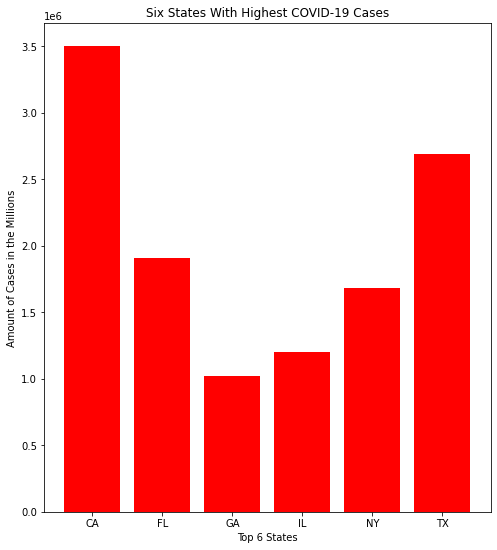

In [21]:
plt.figure(figsize=(8, 9))
plt.bar(df_hi_states['state'], df_hi_states['positive'], color='red')
plt.title('Six States With Highest COVID-19 Cases')
plt.xlabel('Top 6 States')
plt.ylabel('Amount of Cases in the Millions')

In [22]:
df_CA = df[df.state == 'CA']
df_CA.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
5,2021-03-07,CA,3501394.0,-1.0,-1.0,-1.0,totalTestsViral,49646014.0,4291.0,-1.0,...,-1.0,258,0,63c5c0fd2daef2fb65150e9db486de98ed3f7b72,0,0,0,0,0,-1.0
61,2021-03-06,CA,3497578.0,-1.0,-1.0,-1.0,totalTestsViral,49512828.0,4513.0,-1.0,...,-1.0,418,0,54b454d1890500b58f2f6b964b37bc373242b0dc,0,0,0,0,0,-1.0
117,2021-03-05,CA,3493126.0,-1.0,-1.0,-1.0,totalTestsViral,49294503.0,4714.0,-1.0,...,-1.0,400,0,255ceaacd8aef4c38fd655917cba2f7806784c0a,0,0,0,0,0,-1.0
173,2021-03-04,CA,3488467.0,-1.0,-1.0,-1.0,totalTestsViral,49147685.0,4967.0,-1.0,...,-1.0,273,0,cc0edfeae13c59b87ec961d01dac49137a894da9,0,0,0,0,0,-1.0
229,2021-03-03,CA,3484963.0,-1.0,-1.0,-1.0,totalTestsViral,49028048.0,5110.0,-1.0,...,-1.0,278,0,7a6abcae85445835536365a8f820794cf8f4359f,0,0,0,0,0,-1.0


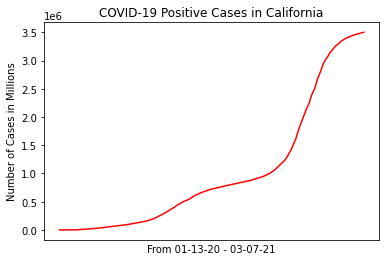

In [23]:
plt.plot(df_CA['date'], df_CA['positive'], color='red')
plt.title('COVID-19 Positive Cases in California')
plt.ylabel('Number of Cases in Millions')
plt.xlabel('From 01-13-20 - 03-07-21')
plt.xticks([])
plt.show()

In [24]:
df_OK = df[df.state == 'OK']
df_OK.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
39,2021-03-07,OK,428997.0,-1.0,3146300.0,2984.0,posNeg,3575297.0,346.0,24332.0,...,-1.0,0,55,3019887dd90821b78021a57adfdafde0617d7a31,0,0,0,0,0,-1.0
95,2021-03-06,OK,428536.0,-1.0,3146300.0,2984.0,posNeg,3574836.0,346.0,24277.0,...,-1.0,0,120,975991be71999ea105003738a7c026e558d688d6,0,0,0,0,0,-1.0
151,2021-03-05,OK,427558.0,-1.0,3135060.0,3464.0,posNeg,3562618.0,366.0,24157.0,...,-1.0,0,54,98d53791802179a4ba01ae3dea81497d5bc0b293,0,0,0,0,0,-1.0
207,2021-03-04,OK,426641.0,-1.0,3126761.0,3620.0,posNeg,3553402.0,404.0,24103.0,...,-1.0,0,39,9f166417bd713ef15a020f737a6cf32ae60221bb,0,0,0,0,0,-1.0
263,2021-03-03,OK,425746.0,-1.0,3116303.0,3021.0,posNeg,3542049.0,427.0,24064.0,...,-1.0,0,65,f69ee24f323dd23d507e95d770c4917552a3f2b8,0,0,0,0,0,-1.0


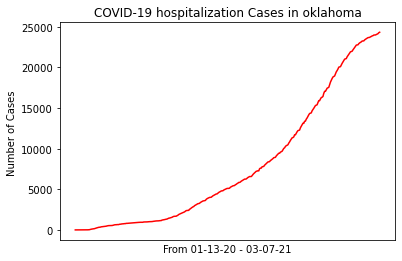

In [25]:
plt.plot(df_OK['date'], df_OK['hospitalized'], color='red')
plt.title('COVID-19 hospitalization Cases in oklahoma')
plt.ylabel('Number of Cases ')
plt.xlabel('From 01-13-20 - 03-07-21')
plt.xticks([])
plt.show()

In [26]:
df_TX = df[df.state == 'TX']
df_TX.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
47,2021-03-07,TX,2686818.0,365961.0,-1.0,-1.0,totalTestsViral,19907384.0,4721.0,-1.0,...,-1.0,84,0,3fcdc4c2d3b36a167a791fa8677cf5d19ca67464,0,0,0,0,0,-1.0
103,2021-03-06,TX,2683865.0,365343.0,-1.0,-1.0,totalTestsViral,19831344.0,4921.0,-1.0,...,-1.0,233,0,6be43b228d92cd0a7b928066d777c7ed45f8b8cf,0,0,0,0,0,-1.0
159,2021-03-05,TX,2678295.0,364108.0,-1.0,-1.0,totalTestsViral,19820052.0,5065.0,-1.0,...,-1.0,256,0,5269b5325eb28e1fdacd17f2e31677af30b83874,0,0,0,0,0,-1.0
215,2021-03-04,TX,2671442.0,362318.0,-1.0,-1.0,totalTestsViral,19764177.0,5263.0,-1.0,...,-1.0,315,0,8e71c02df035870db42a3cd7a8dd62d52209ce81,0,0,0,0,0,-1.0
271,2021-03-03,TX,2663414.0,359333.0,-1.0,-1.0,totalTestsViral,19707655.0,5508.0,-1.0,...,-1.0,297,0,2b74dc8a7a6f77a8244ed89e85d1f6658ce68bcf,0,0,0,0,0,-1.0


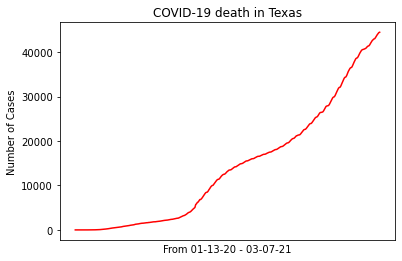

In [27]:
plt.plot(df_TX['date'], df_TX['death'], color='red')
plt.title('COVID-19 death in Texas')
plt.ylabel('Number of Cases')
plt.xlabel('From 01-13-20 - 03-07-21')
plt.xticks([])
plt.show()

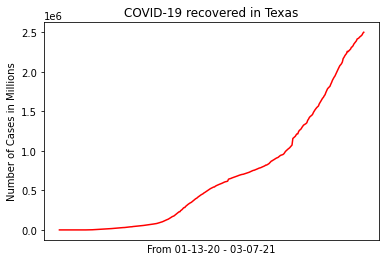

In [32]:
plt.plot(df_TX['date'], df_TX['recovered'], color='red')
plt.title('COVID-19 recovered in Texas')
plt.ylabel('Number of Cases in Millions')
plt.xlabel('From 01-13-20 - 03-07-21')
plt.xticks([])
plt.show()

In [29]:
df_NY = df[df.state == 'NY']
df_NY.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
37,2021-03-07,NY,1681169.0,-1.0,-1.0,-1.0,totalTestEncountersViral,39695100.0,4789.0,-1.0,...,-1.0,59,0,8b1ad6376deb03844d4e5e3f615197da1b3a214e,0,0,0,0,0,-1.0
93,2021-03-06,NY,1674380.0,-1.0,-1.0,-1.0,totalTestEncountersViral,39467332.0,4954.0,-1.0,...,-1.0,79,0,c7ae8ab7600d0db452429e5692968b185e90d1de,0,0,0,0,0,-1.0
149,2021-03-05,NY,1666733.0,-1.0,-1.0,-1.0,totalTestEncountersViral,39194200.0,5034.0,-1.0,...,-1.0,95,0,99bf166f33908a152c9badb3464d1899821323a5,0,0,0,0,0,-1.0
205,2021-03-04,NY,1657777.0,-1.0,-1.0,-1.0,totalTestEncountersViral,38897265.0,5177.0,-1.0,...,-1.0,61,0,39d0cec8753202639bdd32abdd228cc6c891d862,0,0,0,0,0,-1.0
261,2021-03-03,NY,1650184.0,-1.0,-1.0,-1.0,totalTestEncountersViral,38627176.0,5323.0,-1.0,...,-1.0,75,0,91cc3a4e0e57073b8997de61de8a6e385cf66599,0,0,0,0,0,-1.0


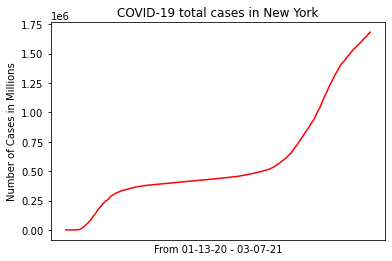

In [31]:
plt.plot(df_NY['date'], df_NY['total'], color='red')
plt.title('COVID-19 total cases in New York')
plt.ylabel('Number of Cases in Millions')
plt.xlabel('From 01-13-20 - 03-07-21')
plt.xticks([])
plt.show()